In [1]:
# !pip install textblob

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')  

In [3]:
os.chdir(r"C:\Users\Komal\Downloads\consumer_complaints.csv")

In [4]:
df = pd.read_csv("consumer_complaints.csv")
df.head()

c:\users\komal\anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


# EDA (Exploratory Data Analysis)

In [5]:
df.shape

(555957, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [7]:
df.describe(include='all')

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
count,555957,555957,397635,555957,212622,66806,85124,555957,551070,551452,77959,123458,555957,555957,555957,555957,555957,5.559570e+05
unique,1608,11,46,95,68,65646,10,3605,62,27052,3,4,6,1557,8,2,2,NaN
top,08/27/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,This company continues to report on my credit ...,Company chooses not to provide a public response,Bank of America,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No,NaN
freq,963,186475,74319,97191,26798,37,52478,55998,81700,1205,45257,66807,361338,1108,404293,541909,443823,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600510e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.504296e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.863230e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.737830e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441702e+06


In [8]:
#missing value percentage

df.isnull().sum()/df.shape[0]*100  

date_received                    0.000000
product                          0.000000
sub_product                     28.477382
issue                            0.000000
sub_issue                       61.755675
consumer_complaint_narrative    87.983603
company_public_response         84.688744
company                          0.000000
state                            0.879025
zipcode                          0.810314
tags                            85.977513
consumer_consent_provided       77.793606
submitted_via                    0.000000
date_sent_to_company             0.000000
company_response_to_consumer     0.000000
timely_response                  0.000000
consumer_disputed?               0.000000
complaint_id                     0.000000
dtype: float64

In [9]:
df1 = df[['complaint_id','date_received','product','issue','company',
          'state','submitted_via','company_response_to_consumer',
          'timely_response','consumer_disputed?',
          'consumer_complaint_narrative']]

In [10]:
df1 = df1[pd.notnull(df1['consumer_complaint_narrative'])]
df1

,complaint_id,date_received,product,issue,company,state,submitted_via,company_response_to_consumer,timely_response,consumer_disputed?,consumer_complaint_narrative
190126,1290516,03/19/2015,Debt collection,Cont'd attempts collect debt not owed,"Diversified Consultants, Inc.",NY,Web,Closed with explanation,Yes,No,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,1290492,03/19/2015,Consumer Loan,Managing the loan or lease,M&T Bank Corporation,VA,Web,Closed with explanation,Yes,No,Due to inconsistencies in the amount owed that...
190155,1290524,03/19/2015,Mortgage,"Loan modification,collection,foreclosure",Wells Fargo & Company,CA,Web,Closed with explanation,Yes,Yes,In XX/XX/XXXX my wages that I earned at my job...
190207,1290253,03/19/2015,Mortgage,"Loan servicing, payments, escrow account",JPMorgan Chase & Co.,CA,Web,Closed with explanation,Yes,Yes,I have an open and current mortgage with Chase...
190208,1292137,03/19/2015,Mortgage,Credit decision / Underwriting,Rushmore Loan Management Services LLC,CA,Web,Closed with explanation,Yes,Yes,XXXX was submitted XX/XX/XXXX. At the time I s...
...,...,...,...,...,...,...,...,...,...,...,...
553084,1782682,02/10/2016,Credit reporting,Incorrect information on credit report,"TransUnion Intermediate Holdings, Inc.",WA,Web,Closed with explanation,Yes,No,"XXXX XXXX is reporting incorrectly, payments h..."
553085,1781861,02/10/2016,Credit reporting,Incorrect information on credit report,"TransUnion Intermediate Holdings, Inc.",WA,Web,Closed with explanation,Yes,No,Reflecting incorrect payment status. Have been...
553086,1782804,02/11/2016,Payday loan,Charged fees or interest I didn't expect,Zarvad III S.A.,NV,Web,Closed with explanation,Yes,No,I have been paying {$180.00} a month through d...
553090,1855199,03/30/2016,Mortgage,"Application, originator, mortgage broker",Amerisave,AZ,Web,Closed with explanation,Yes,Yes,I recently became aware that Amerisave Mortgag...


In [11]:
df1['product'].value_counts()

Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: product, dtype: int64

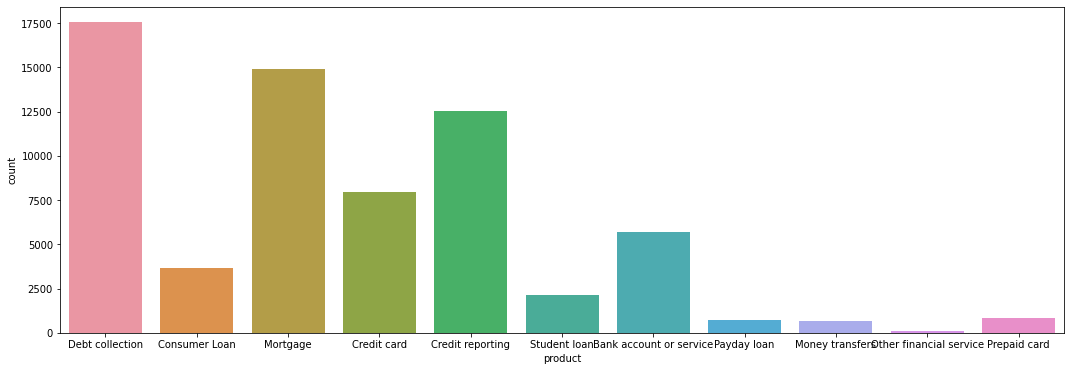

In [12]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='product',data=df1);

# Text Data Preprocessing

In [13]:
#lowering the text
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))


In [14]:
#Removing Punctuations
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")


<ipython-input-14-1a3cc3866183>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")


In [15]:
#Removing Stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [16]:
#Lemmatizing

from textblob import Word

df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))

In [17]:
df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].str.replace(r"xx+\s","")

<ipython-input-17-f251cf6e0ebb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].str.replace(r"xx+\s","")


In [18]:
df1["consumer_complaint_narrative"].head()

190126    claimed owe 2700 year despite proof payment se...
190135    due inconsistency amount owed told bank amount...
190155    wage earned job decreased almost half knew tro...
190207    open current mortgage chase bank chase reporti...
190208    submitted time submitted complaint dealt rushm...
Name: consumer_complaint_narrative, dtype: object

In [19]:
#Train/Test split

train_x, valid_x, train_y, valid_y = train_test_split(df1['consumer_complaint_narrative'], df1['product'],stratify=df1['product'], 
                                                    test_size=0.25)

# Feature engineering of consumer complaint with TF-IDF

In [20]:
##label encoding target variable

enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)

In [21]:
##tf-idf verctor representation

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df1['consumer_complaint_narrative'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# SVC

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,train_y)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]})

In [24]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 0.1}
0.8442239321377203


In [25]:
final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,train_y)

LinearSVC(C=0.1)

In [26]:
final_svc_predict = final_svc.predict(xvalid_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, valid_y)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.8505568195425698


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(valid_y, final_svc_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.80      0.81      1428
          Consumer Loan       0.82      0.60      0.69       920
               Mortgage       0.80      0.81      0.80      1982
            Credit card       0.85      0.85      0.85      3132
       Credit reporting       0.83      0.90      0.86      4388
           Student loan       0.85      0.64      0.73       166
Bank account or service       0.92      0.96      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.67      0.24      0.35       182
Other financial service       0.86      0.67      0.75       215
           Prepaid card       0.92      0.78      0.84       532

               accuracy                           0.85     16702
              macro avg       0.76      0.66      0.69     16702
           weighted avg       0.85      0.85      0.85     16702



c:\users\komal\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\komal\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\komal\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


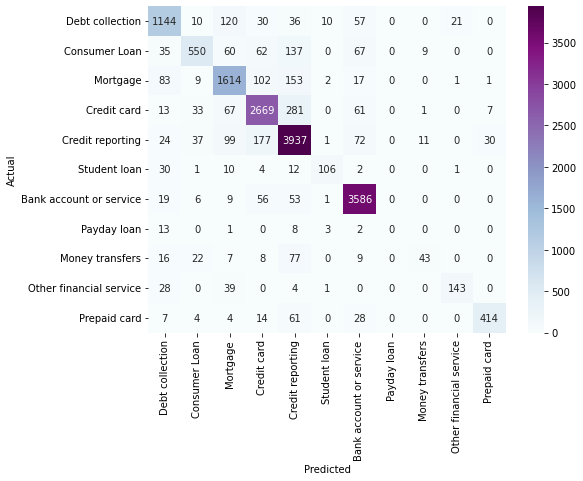

In [28]:
conf_mat = confusion_matrix(valid_y, final_svc_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(final_svc,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)


In [22]:
import pickle

# save
with open('vectorizer.pkl','wb') as f:
    pickle.dump(tfidf_vect,f)

# load
with open('vectorizer.pkl', 'rb') as f:
    v = pickle.load(f)


In [ ]:
tfidf_vect

In [ ]:
clf2.predict(X[0:1])

# XGBoost

In [48]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3,subsample=0.8)
xgb_model.fit(xtrain_tfidf, train_y)